# Day 11: Support Vector Machines (SVM)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_moons, make_circles


In [9]:
# Load dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target


In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Train SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
# Predict
y_pred = clf.predict(X_test)
print("Classification Report (Linear Kernel):\n", classification_report(y_test, y_pred))


Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



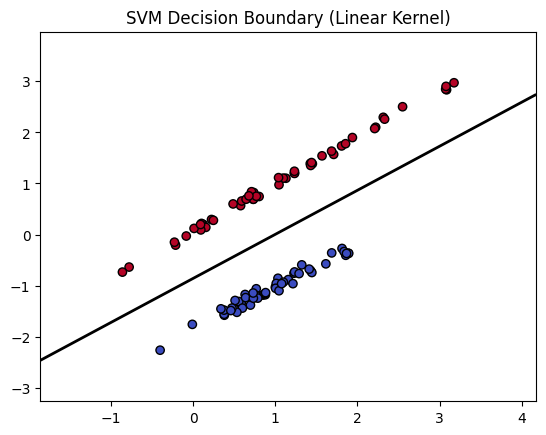

In [13]:
# 2. Visualization of SVM Decision Boundary (Linear Kernel)
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                       n_clusters_per_class=1, random_state=42)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

xlim = [X_train[:, 0].min() - 1, X_train[:, 0].max() + 1]
ylim = [X_train[:, 1].min() - 1, X_train[:, 1].max() + 1]
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X_ = np.meshgrid(y, x)
xy = np.vstack([X_.ravel(), Y.ravel()]).T
P = model.decision_function(xy).reshape(X_.shape)

plt.contour(X_, Y, P, levels=[0], linewidths=2, colors='black')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlim(xlim)
plt.ylim(ylim)
plt.title("SVM Decision Boundary (Linear Kernel)")
plt.show()


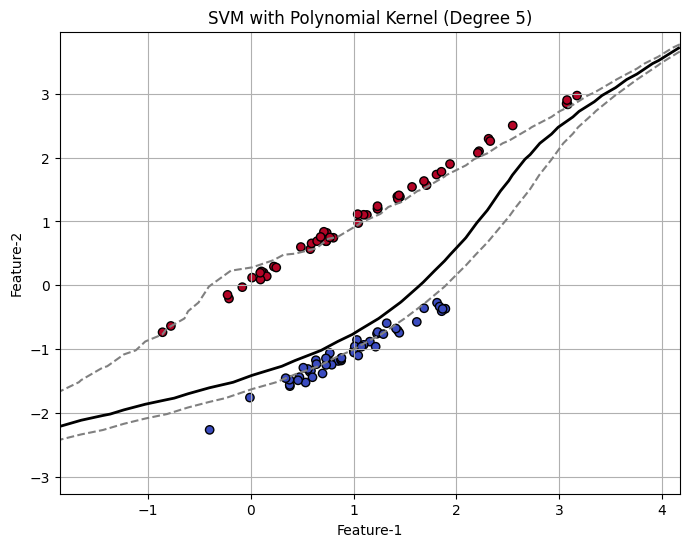

In [14]:
# 3. SVM with Polynomial Kernel
model = SVC(kernel='poly', degree=5)
model.fit(X_train, y_train)
P = model.decision_function(xy).reshape(X_.shape)

plt.figure(figsize=(8, 6))
plt.contour(X_, Y, P, levels=[0], linewidths=2, colors='black')
plt.contour(X_, Y, P, levels=[-1, 1], linestyles='dashed', colors='gray')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("SVM with Polynomial Kernel (Degree 5)")
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.grid(True)
plt.show()


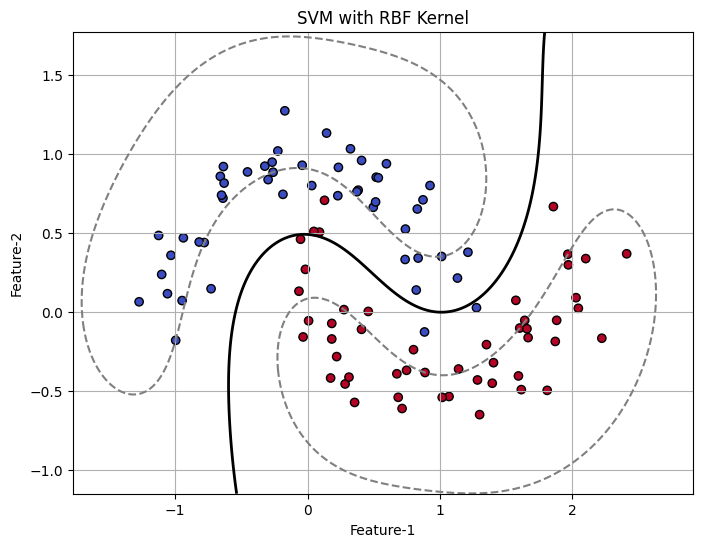

In [15]:
# 4. SVM with RBF Kernel
from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples=100, noise=0.15, random_state=42)
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

xlim = [X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5]
ylim = [X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5]
x = np.linspace(xlim[0], xlim[1], 300)
y = np.linspace(ylim[0], ylim[1], 300)
Y, X_ = np.meshgrid(y, x)
xy = np.vstack([X_.ravel(), Y.ravel()]).T
P = model.decision_function(xy).reshape(X_.shape)

plt.figure(figsize=(8, 6))
plt.contour(X_, Y, P, levels=[0], linewidths=2, colors='black')
plt.contour(X_, Y, P, levels=[-1, 1], linestyles='dashed', colors='gray')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("SVM with RBF Kernel")
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.grid(True)
plt.show()

Accuracy: 0.925
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        22
           1       0.86      1.00      0.92        18

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.94      0.93      0.93        40



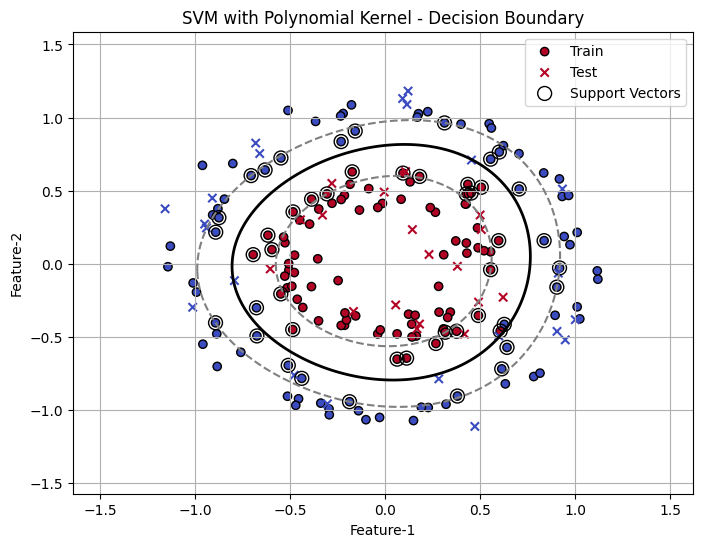

In [16]:
# 5. New Example: Polynomial Kernel on Circular Data
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, factor=0.5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='poly', degree=3, C=0.1, gamma='scale', coef0=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

xlim = [X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5]
ylim = [X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5]
xx = np.linspace(xlim[0], xlim[1], 300)
yy = np.linspace(ylim[0], ylim[1], 300)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

plt.figure(figsize=(8, 6))
plt.contour(XX, YY, Z, levels=[0], linewidths=2, colors='black')
plt.contour(XX, YY, Z, levels=[-1, 1], linestyles='dashed', colors='gray')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label="Support Vectors")
plt.title("SVM with Polynomial Kernel - Decision Boundary")
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.grid(True)
plt.legend()
plt.show()
